In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

In [7]:
# !ls

In [8]:
in_file = open("test.htm", "r")
in_file.readline()
in_file.readline()
my_str = in_file.readline()

In [9]:
my_list = my_str.split('"comments":')

In [10]:
my_list = my_list[1:]

In [11]:
comments = [s.split('"id":')[0] for s in my_list]

In [12]:
for e in comments:
    print(e)

"Had a lovely stay in this charming home. I was visiting family who lived in the same development so the location was perfect. The bed was comfy and while I generally prefer staying in “entire home” options, I never felt like I was imposing or being imposed upon. I absolutely plan to stay here again the next time I’m in town.",
"Very clean place. The host Carol is friendly and has lots of stories she likes to share.",
"The host and location is very accommodating. My first time in Austin TX was very enjoyable.",
"Great place to stay, safe, clean, simple, easy and a wonderful host!",
"A wonderful second stay, simple, easy, and in a great neighborhood.  You are close enough to everything you might need, but a quiet and safe place away from it all!  ",
"Great place to stay, simple, clean, Carol is fantastic and Chalu is your ideal arranger!  Fully recommend and close enough to everything you need in Austin.   The best recommendation is returning and I'll be back - already rebooked!",
"Chal

In [13]:
comments

['"Had a lovely stay in this charming home. I was visiting family who lived in the same development so the location was perfect. The bed was comfy and while I generally prefer staying in “entire home” options, I never felt like I was imposing or being imposed upon. I absolutely plan to stay here again the next time I’m in town.",',
 '"Very clean place. The host Carol is friendly and has lots of stories she likes to share.",',
 '"The host and location is very accommodating. My first time in Austin TX was very enjoyable.",',
 '"Great place to stay, safe, clean, simple, easy and a wonderful host!",',
 '"A wonderful second stay, simple, easy, and in a great neighborhood.  You are close enough to everything you might need, but a quiet and safe place away from it all!  ",',
 '"Great place to stay, simple, clean, Carol is fantastic and Chalu is your ideal arranger!  Fully recommend and close enough to everything you need in Austin.   The best recommendation is returning and I\'ll be back - al

In [14]:
wordcloud = WordCloud().generate(comments[5])

(-0.5, 399.5, 199.5, -0.5)

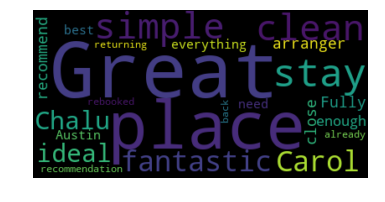

In [15]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [2]:
from requests_html import HTMLSession

In [16]:
csv = pd.read_csv("Airbnb_Texas_Rentals.csv")
df = pd.DataFrame(csv)
df.head(1)

,Unnamed: 0,average_rate_per_night,bedrooms_count,city,date_of_listing,description,latitude,longitude,title,url
0,1,$27,2,Humble,May 2016,Welcome to stay in private room with queen bed...,30.020138,-95.293996,2 Private rooms/bathroom 10min from IAH airport,https://www.airbnb.com/rooms/18520444?location...


In [46]:
# df["url"].astype('string')
urls = df["url"].astype('str')
# urls.dtype


In [58]:
session = HTMLSession() 
test = []
for url in urls[0:10]: 
    r = session.get(url)
#     print(r.html.find('#reviews'))
    if r.html.find('#reviews'):
        reviews = r.html.find('#reviews')[0]
        review_list = [line for line in reviews.text.split("\n") if len(line) > 50]
#         time.sleep(12)
    for r in review_list:
        test.append({
            "url": url,
            "review": r
        })
    time.sleep(10)    

In [62]:
df = pd.DataFrame(test)
df.to_csv('review_sample.csv')
df.head()

,review,url
0,Victoria's place was clean and she was great w...,https://www.airbnb.com/rooms/18520444?location...
1,Victoria’s place is a charming place! A great ...,https://www.airbnb.com/rooms/18520444?location...
2,Victoria is very kind and accommodating. I so ...,https://www.airbnb.com/rooms/18520444?location...
3,"Everything was great, very simple, easy for my...",https://www.airbnb.com/rooms/18520444?location...
4,Victoria was very nice. Picked me up and dropp...,https://www.airbnb.com/rooms/18520444?location...


In [5]:
allr = df["review"]
r = allr.str.cat(sep=',')

NameError: name 'df' is not defined

In [84]:
df['review'].count()

34

In [81]:
# Generate word cloud
wordcloud = WordCloud().generate(r)

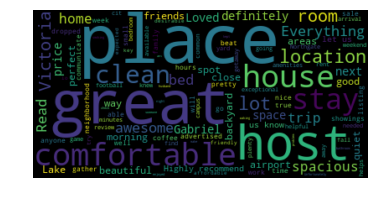

In [82]:
# Plot wordcloud and then save as png
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud_airbnb_reviews_sample.png')

In [61]:
# tdict = {}
# for u, t in test[0]:
#     tdict["id"] = u
#     tdict["review"] = t
# tdict

In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [4]:
# Run Vader Analysis on Passage
compound = analyzer.polarity_scores(r)["compound"]
pos = analyzer.polarity_scores(r)["pos"]
neu = analyzer.polarity_scores(r)["neu"]
neg = analyzer.polarity_scores(r)["neg"]

NameError: name 'r' is not defined